In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math

In [40]:
df = pd.read_csv('../data/demo-4.csv')

In [41]:
# Standardize column names and remove extra spaces
df["model_type"] = df["model_type"].str.strip().str.lower()

# Create an undirected graph
G = nx.Graph()

# Add nodes (sourcesinks, bridges, intersections, and links)
for _, row in df.iterrows():
    G.add_node(row["id"], model_type=row["model_type"], name=row["name"], lat=row["lat"], lon=row["lon"])

# Add edges ensuring correct connection rules
for i in range(len(df) - 1):
    node1 = df.iloc[i]["id"]
    node2 = df.iloc[i + 1]["id"]
    length = df.iloc[i]["length"]
    type1 = df.iloc[i]["model_type"]
    type2 = df.iloc[i + 1]["model_type"]

    # Ensure connections follow logical rules:
    # - Do NOT connect two sourcesinks
    # - Links connect elements properly
    if not (type1 == "sourcesink" and type2 == "sourcesink"):
        if node1 in G.nodes and node2 in G.nodes:
            G.add_edge(node1, node2, weight=length)


In [44]:
 # OPTION 1
  #create a dictionary (pos) that maps each node to its (longitude, latitude) , but only if both coordinates are not NaN!!
pos = {}
for node in G.nodes:
    lat = G.nodes[node]["lat"]
    lon = G.nodes[node]["lon"]
    if not pd.isna(lat) and not pd.isna(lon):  # Only add valid coordinates
        pos[node] = (lon, lat)  # Store coordinates as (x, y) = (longitude, latitude)


In [45]:
# OPTION 2

#pos = nx.spring_layout(G)

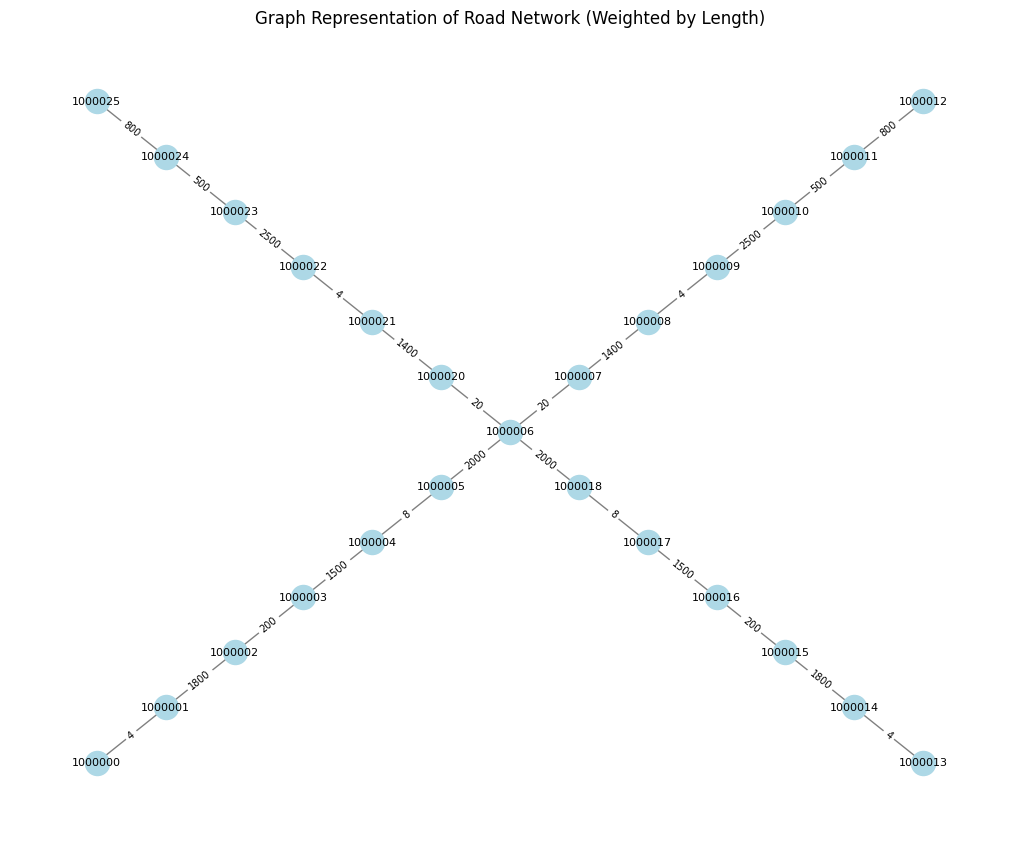

In [46]:
# Draw the graph
plt.figure(figsize=(10, 8))
edges = G.edges(data=True)

# Draw edges with weights
nx.draw(G, pos, with_labels=True, node_size=300, node_color="lightblue", edge_color="gray", font_size=8)

nx.draw_networkx_edge_labels(G,pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in edges}, font_size=7)

# Show the graph
plt.title("Graph Representation of Road Network (Weighted by Length)")
plt.show()

In [38]:
# Define source and target nodes
source_node = 1000000  # Replace with an actual sourcesink ID
target_node = 1000013  # Replace with the target node ID

try:
    # Compute shortest path and its length
    shortest_path = nx.shortest_path(G, source=source_node, target=target_node, weight="weight")
    total_distance = nx.shortest_path_length(G, source=source_node, target=target_node, weight="weight")

    # Print the results
    print(f"Shortest path from {source_node} to {target_node}: {shortest_path}")
    print(f"Total distance: {total_distance} meters")
except nx.NetworkXNoPath:
    print(f"No path found between {source_node} and {target_node}.")
except nx.NodeNotFound as e:
    print(f"Error: {e}")

Shortest path from 1000000 to 1000013: [1000000, 1000001, 1000002, 1000003, 1000004, 1000005, 1000006, 1000018, 1000017, 1000016, 1000015, 1000014, 1000013]
Total distance: 11024 meters


In [47]:
   # Call the function to display the graph

FileNotFoundError: [Errno 2] No such file or directory: '../data/demo-4.csv'